In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
#import warnings
#warnings.filterwarnings(action='ignore')

In [2]:
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import os
#print(os.listdir("../input"))

In [7]:
data = pd.read_csv(r"C:\Users\Rahi\Downloads\mcdonalds.csv")

In [8]:
print(data.shape)

(1453, 15)


In [9]:
print(data.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [10]:
# This gives us the basic summary statistics
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [11]:
class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"

<Axes: >

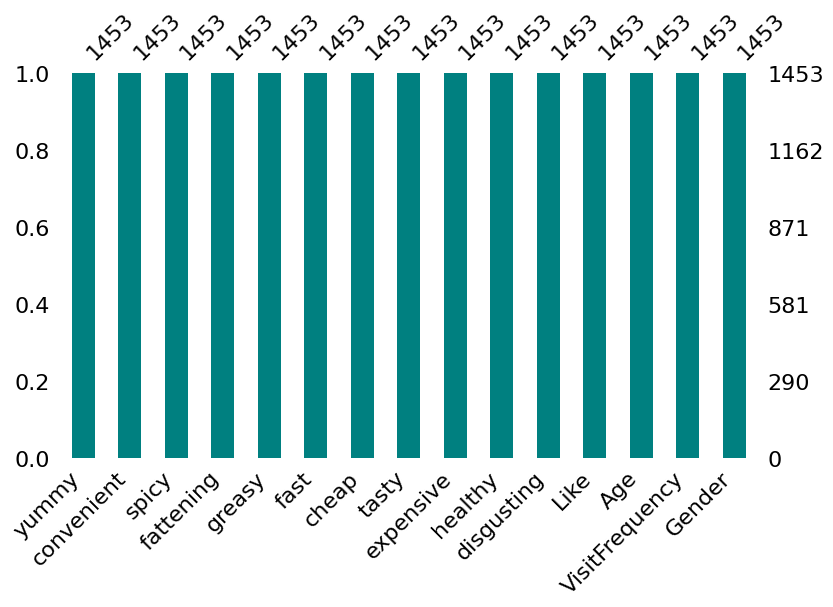

In [12]:
msno.bar(data, figsize=(9,5), color=Colors.Teal)
# As we see below, there is no missing value found.

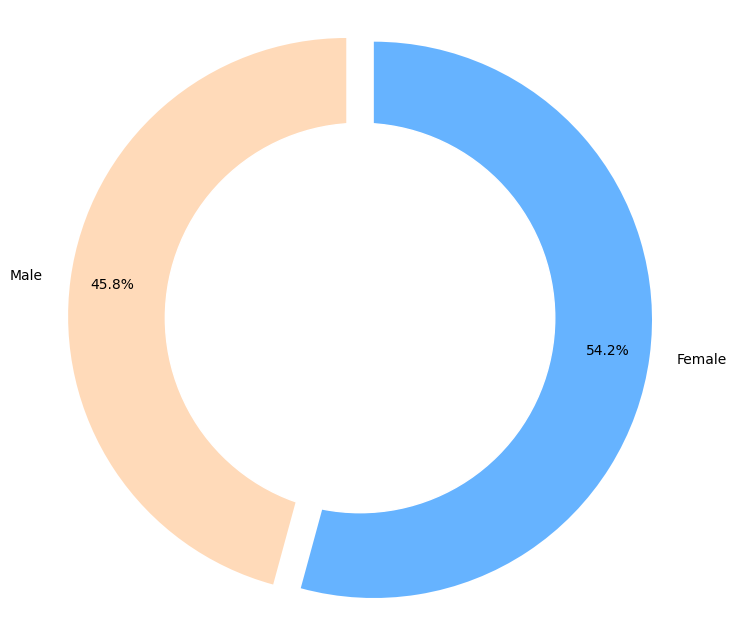

In [13]:
#GENDER
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

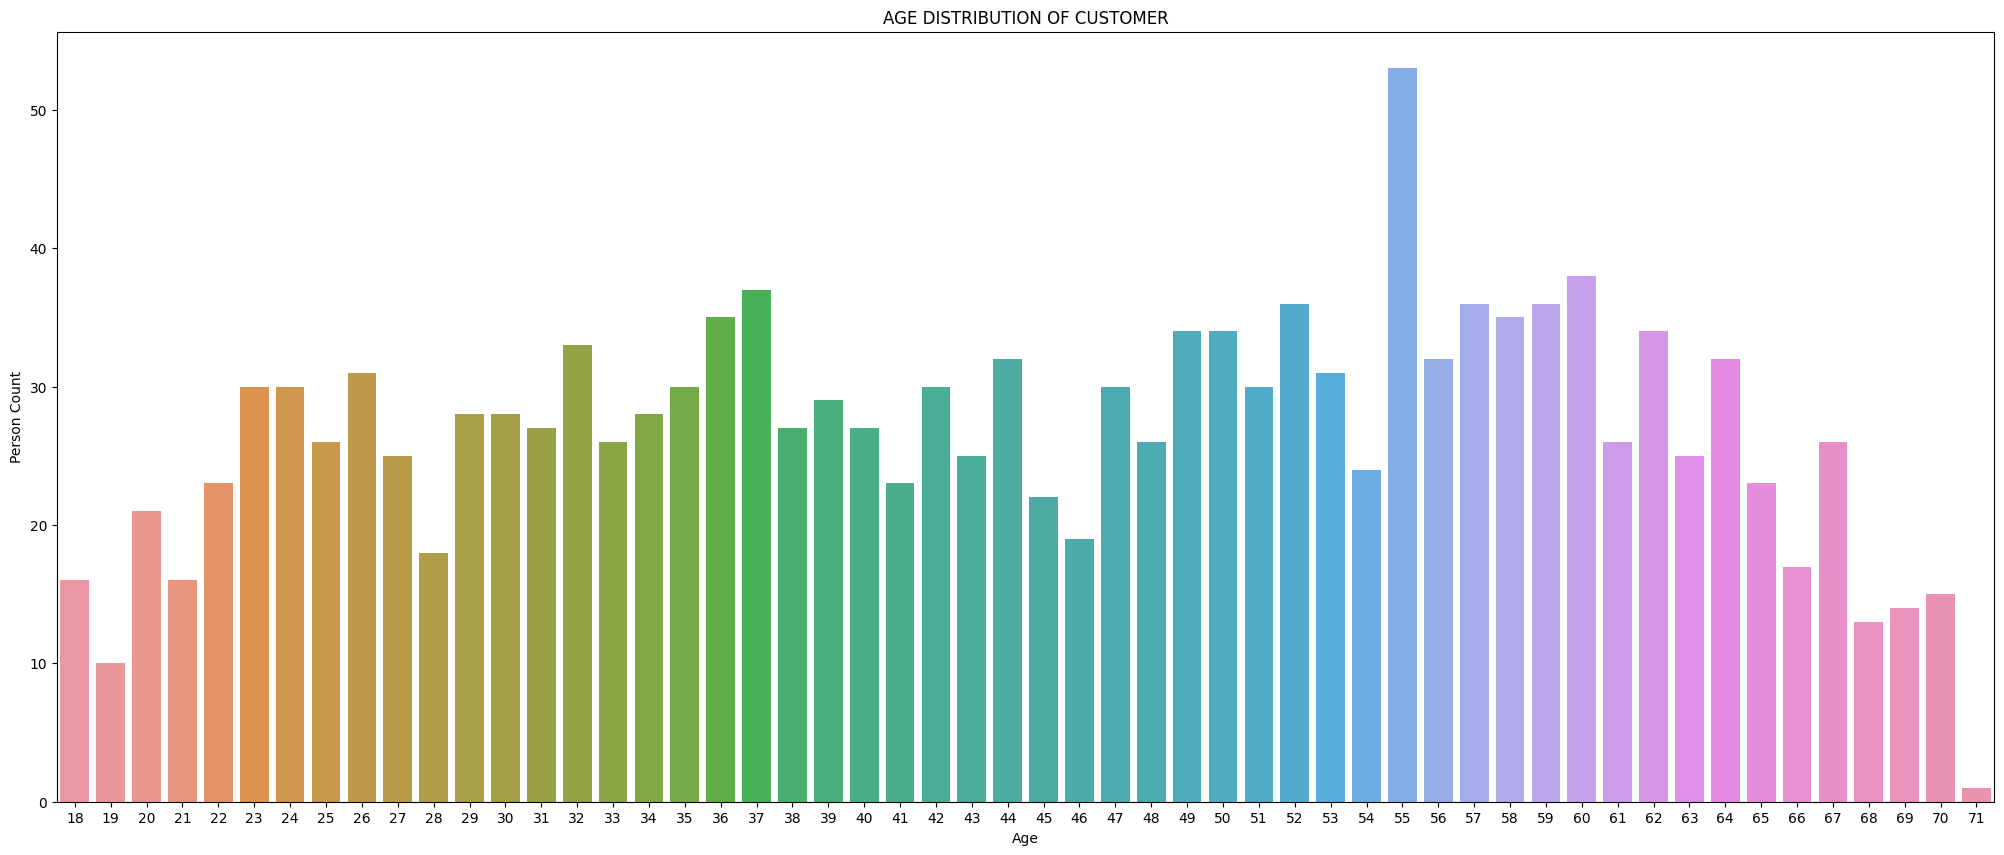

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x = data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.title('AGE DISTRIBUTION OF CUSTOMER')
plt.show()

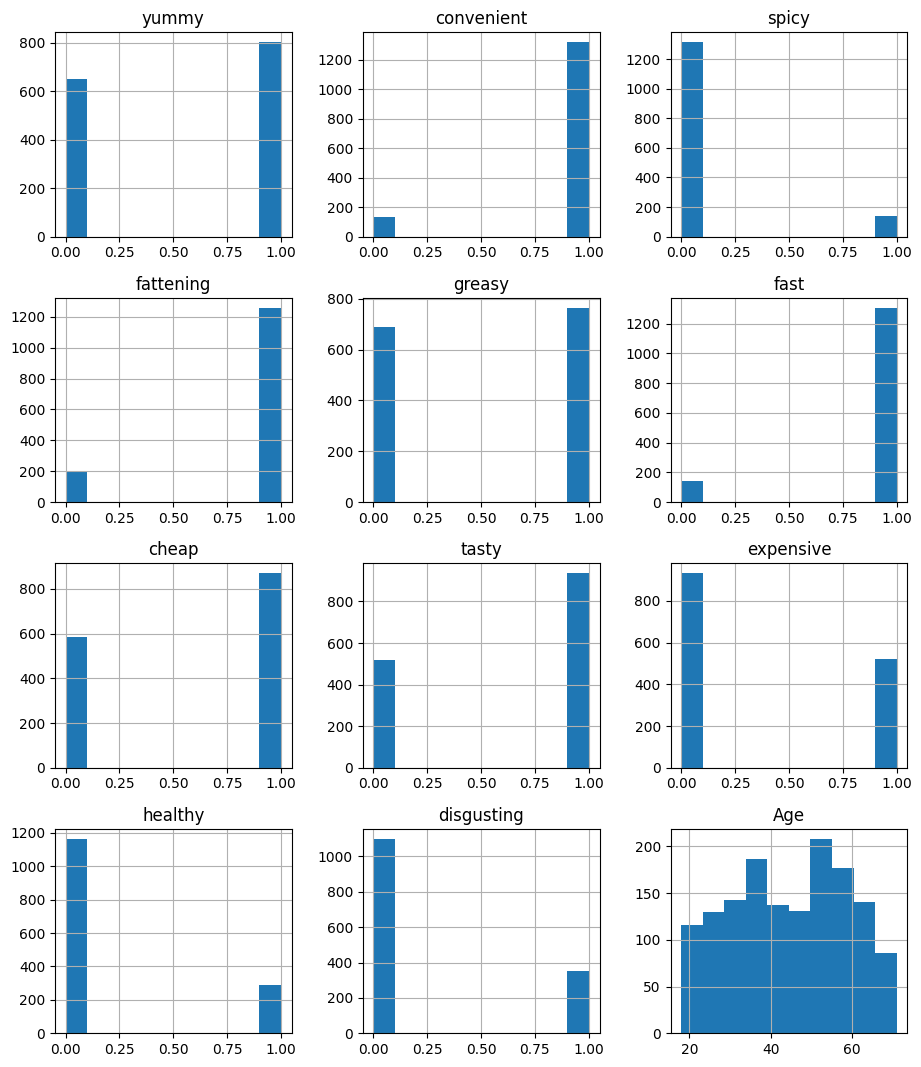

In [22]:
# Label encoding for categorical variables (Converting 11 cols with yes/no)

from sklearn.preprocessing import LabelEncoder

def label_encoding(column):
    data[column] = LabelEncoder().fit_transform(data[column])

categories = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
              'tasty', 'expensive', 'healthy', 'disgusting']

for category in categories:
    label_encoding(category)

# Histogram of each attribute
plt.rcParams['figure.figsize'] = (11, 13)
data.hist()
plt.show()

In [31]:
#define k value
wcss = []
#data_model = data.drop(['Gender','CustomerID'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

ValueError: could not convert string to float: 'I love it!+5'

In [40]:
# Considering only the 11 cols and converting it into an array
x = data.loc[:, categories].values

df_eleven = data.loc[:, categories]
df_eleven

# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)
pca = PCA(n_components=11)
pc = pca.fit_transform(x)

pca_variances = pca.explained_variance_ratio_
pca_cumulative_variances = np.cumsum(pca_variances)

In [41]:
# Correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame(data=loadings.T, columns=pc_list)
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')

In [36]:
pip install bioinfokit


                                              0.0/87.0 kB ? eta -:--:--
     -----------------                      41.0/87.0 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 87.0/87.0 kB 983.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
 

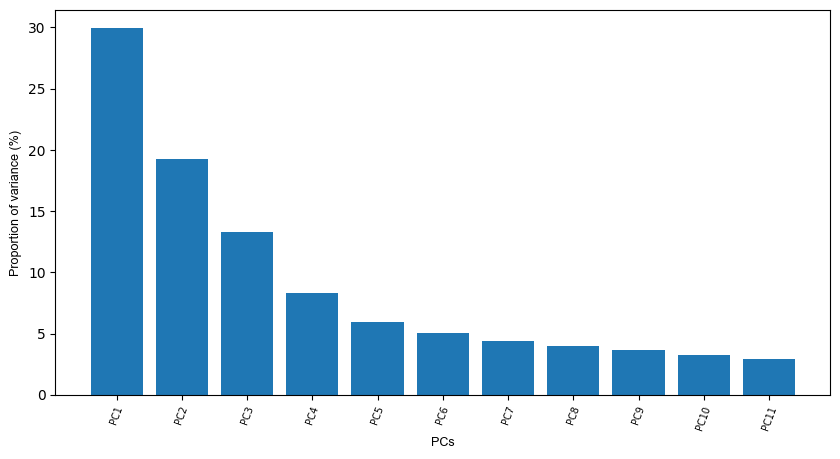

In [42]:
#Scree plot (Elbow test) - PCA
from bioinfokit.visuz import cluster

cluster.screeplot(obj=[pc_list, pca_variances], show=True, dim=(10, 5))

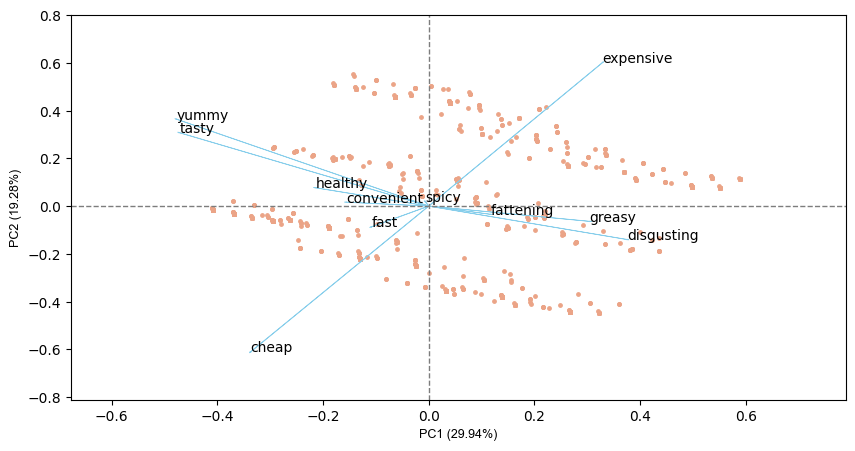

In [44]:
# Get 2D biplot

pca_scores = PCA().fit_transform(x)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,
var1=round(pca_variances[0] * 100, 2), var2=round(pca_variances[1] * 100, 2),
show=True, dim=(10, 5))

In [46]:
pip install yellowbrick

                                              0.0/282.6 kB ? eta -:--:--
     ----                                    30.7/282.6 kB 1.3 MB/s eta 0:00:01
     ------------                            92.2/282.6 kB 1.1 MB/s eta 0:00:01
     -------------------                    143.4/282.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  276.5/282.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


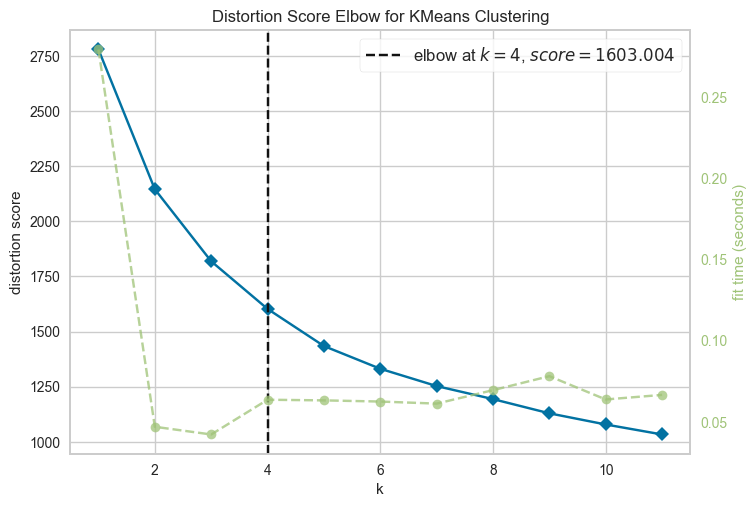

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings 
warnings.filterwarnings('ignore')

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [53]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_ 
print(kmeans.labels_)
print(kmeans.inertia_) 
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_)

[2 1 1 ... 1 3 0]
1603.0165988904655
6
[[0.02083333 0.67916667 0.075      0.91666667 0.70833333 0.74166667
  0.06666667 0.07916667 0.89583333 0.0625     0.725     ]
 [0.87619048 0.95873016 0.13650794 0.9047619  0.60634921 0.85714286
  0.10793651 0.93015873 0.92063492 0.20634921 0.10793651]
 [0.0188172  0.90860215 0.08602151 0.91397849 0.58602151 0.95698925
  0.89516129 0.30107527 0.01344086 0.07526882 0.32258065]
 [0.97908745 0.98098859 0.08174905 0.78897338 0.35361217 0.9581749
  0.92585551 0.97338403 0.01901141 0.34410646 0.04752852]]


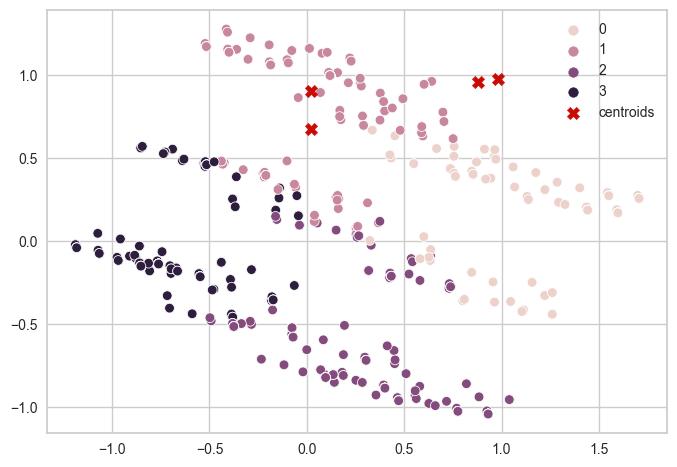

In [57]:
# Visualizing clusters
sns.scatterplot(data=pca_scores, x=pc[:, 0], y=pc[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

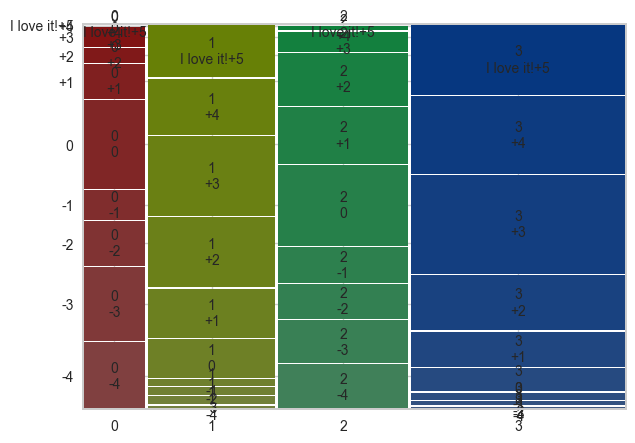

In [62]:
#Describing segments
from statsmodels.graphics.mosaicplot import mosaic

crosstab = pd.crosstab(data['cluster_num'], data['Like'])
#Reordering columns
crosstab = crosstab[[ '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5']]
#Mosaic plot
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()

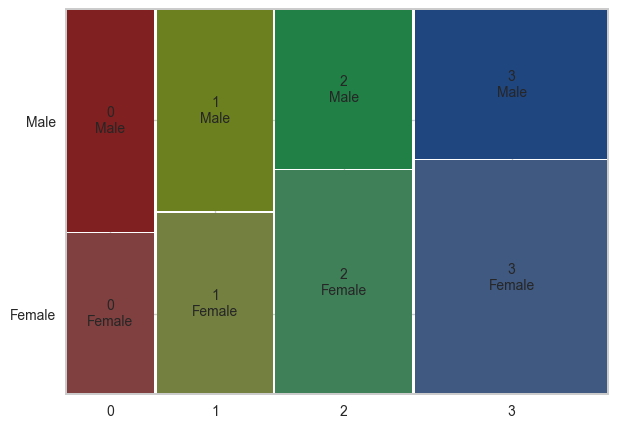

In [64]:
#Mosaic plot for Gender vs Segment
crosstab_gender = pd.crosstab(data['cluster_num'], data['Gender'])

plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

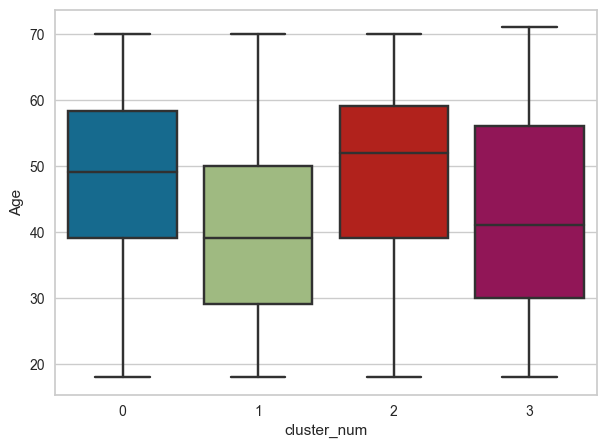

In [66]:
#Box plot for age
sns.boxplot(x="cluster_num", y="Age", data=data)

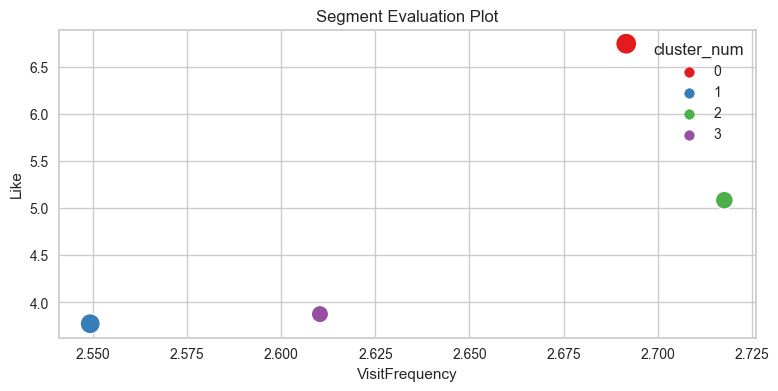

In [72]:
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
like = data.groupby('cluster_num')['Like'].mean()
like = like.to_frame().reset_index()
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
gender = data.groupby('cluster_num')['Gender'].mean()
gender = gender.to_frame().reset_index()

segment = gender.merge(like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
#Target segments
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=segment['Gender']*400, hue=segment['cluster_num'], palette='Set1')
plt.title("Segment Evaluation Plot")
plt.show()